# Lazy Evaluation


In [20]:
import pandas as pd
# create a dataframe
df = pd.DataFrame({
    "Name": ["Mercutio", "Tybalt", "Lady Montague"],
    "Age": [3, 2, 4],
    "Fur": ["Grey", "Grey", "White"]}
  )
# call the DataFrame
df

,Name,Age,Fur
0,Mercutio,3,Grey
1,Tybalt,2,Grey
2,Lady Montague,4,White


In [21]:
# define a groupby computation
df.groupby('Fur').Age.mean()

Fur
Grey     2.5
White    4.0
Name: Age, dtype: float64

In [22]:
# IF DATAFRAME contains more more data than your machine can hold in memory 
# pandas has no choice but try to load that data into memory and fail
# this is why distributed computing libraries like Dask evaluate lazily

In [23]:
import dask.dataframe as dd
# turn df into a Dask dataframe
dask_df = dd.from_pandas(df, npartitions=1)

# call the dataframe
dask_df

,Name,Age,Fur
npartitions=1,,,
0,object,int64,object
2,...,...,...


In [24]:
# define the same groupby computation as above (no results returned)
dask_df.groupby('Fur').Age.mean()
# dask does not return the results when call the dataframe

Dask Series Structure:
npartitions=1
    float64
        ...
Name: Age, dtype: float64
Dask Name: truediv, 6 tasks

In [25]:
# only when we specifically call .compute() Dask actually perform computation
dask_df.groupby('Fur').Age.mean().compute()

Fur
Grey     2.5
White    4.0
Name: Age, dtype: float64

# Embarrassingly Parallel

In [26]:
# Lazy evaluation is allows libraries like Dask to optimize large-scale computations 
# by identifying parts of the computation that are embarrassingly parallel.

# monte carlo simulation 

In [27]:
# a simple for loop is an embarrassingly parallel problem
# this loop run independently and does not in any way affect the other sampling
for i in range(0,5):
    x = i + 5
    print(x)

5
6
7
8
9


# Partitions 

In [28]:
import dask

In [32]:
df = dask.datasets.timeseries(
  "2000-01-01",
  "2000-01-08",
  freq="1h",
  partition_freq="1d"
)


In [33]:
df.to_parquet("test.parquet")


(None,)

In [39]:
import fastparquet as fp


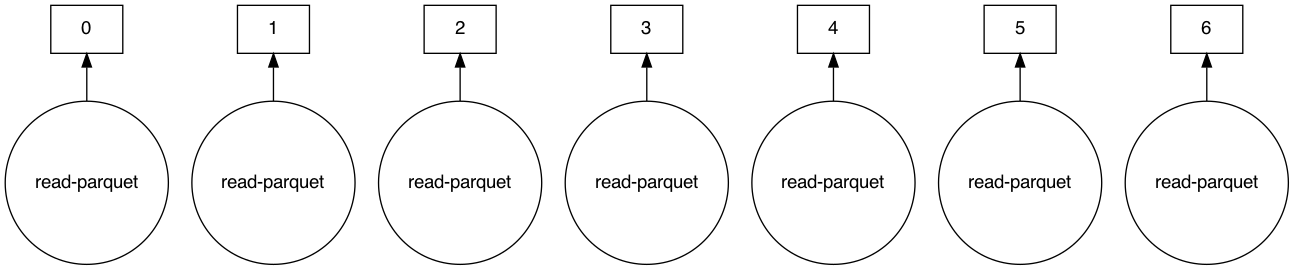

In [44]:
df = dd.read_parquet("./test.parquet")
df.visualize()